## Linear Optimization

### Constraints over sets/lists

Complete the following Pyomo formulation for the LP formulation shown below, and solve. Report the optimal solution.

\begin{equation*}
\begin{aligned}
& \underset{\mathbf{x}}{\text{max}}
& & \mathbf{cx} \\
& \text{subject to}
& & \mathbf{Ax} \le \mathbf{b} \\
& & & \mathbf{x} \ge 0
\end{aligned}
\end{equation*}

$ \mathbf{A} = \begin{bmatrix} 1 & 1\\  -1 & 1 \\ 5 & 4  \end{bmatrix}$

$ \mathbf{b} = \begin{bmatrix} 10 \\  -3 \\ 35  \end{bmatrix}$

$ \mathbf{c} = \begin{bmatrix} 5 &  6   \end{bmatrix}$


In [1]:
from pyomo.environ import *

p = ConcreteModel() 
var = [1,2]
con = [1,2,3]

A = {(1,1):1, (1,2):1, (2,1):-1, (2,2):1, (3,1):5, (3,2):4}
b = {1:10, 2:-3, 3:35}
c = {1:5, 2:6}

p.x = Var(var,within=NonNegativeReals)

p.obj = Objective(expr = sum(c[i]*p.x[i] for i in var), sense = maximize)

def const(m,i):
    return sum(m.x[j]*A[i,j] for j in var) <= b[i]

p.lincon = Constraint(con, rule=const)

solver = SolverFactory('ipopt') 
solver.solve(p)
p.pprint()
print('*** Solution *** :') 
print('x1', value(p.x[1]))
print('x2', value(p.x[2]))
print('objective',value(p.obj))

2 Set Declarations
    lincon_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}
    x_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=x_index
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          1 :     0 :  5.222222248552482 :  None : False : False : NonNegativeReals
          2 :     0 : 2.2222222762968364 :  None : False : False : NonNegativeReals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 5*x[1] + 6*x[2]

1 Constraint Declarations
    lincon : Size=3, Index=lincon_index, Active=True
        Key : Lower : Body            : Upper : Active
          1 :  -Inf :     x[1] + x[2] :  10.0 :   True
          2 :  -Inf :   - x[1] + x[2

## Visualizing the Feasible Space - Graphical Solution

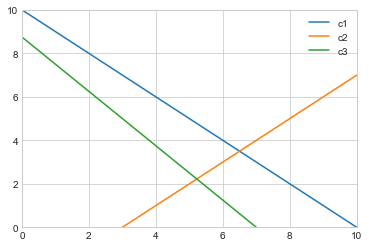

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


fig = plt.figure()
a = plt.axes()
x = np.linspace(0,10,100)
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x, 10-x, label = 'c1')
plt.plot(x, -3+x, label = 'c2')
plt.plot(x, (35-5*x)/4, label = 'c3')
plt.legend();

Verify that the solution you found above is feasible and most optimal out of the vertices of the feasbile region.

Answer above: <br>
(a) How many vertices does the feasible region have? <br>
- 3 

(b) How many constraints are active in optimal solution?
- 2

## Nonlinear Optimization

### Visualizing nonlinear function

Plot the following function:

$$
f(x_{1},x_{2}) = 4x_{1}^{2} - 2.1x_{1}^{4} + \frac{1}{3}x_{1}^{6} + x_{1}x_{2} - 4x_{2}^{2} + 4x_{2}^{4} 
$$

$$
-2 \le x_{1} \le 2
$$

$$
-1 \le x_{2} \le 1
$$

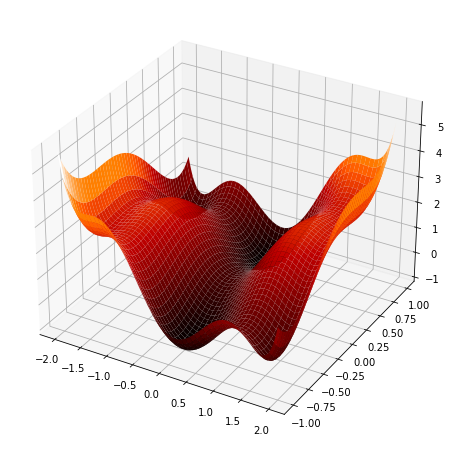

In [4]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(-2,2,0.01)
y = np.arange(-1,1,0.01)
X,Y = np.meshgrid(x,y)
Z = 4*X**2 - 2.1*X**4 + (1/3)*X**(6) + X*Y -  4*Y**2 + 4*Y**4

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, Z,cmap='gist_heat',alpha=1, edgecolor='none')
plt.show()

Just by looking at it, does this function look like it is (a) convex? or (b) nonconvex?

non convex

## Local vs Global Optimization of Nonlinear Function

Write a Pyomo formulation to minimize the above function within the bounds of the variables. 

Solve the function with (a) ipopt, (b) multistart*, (c) BARON solvers. 

What is the global optimum?

*Multistart is a solver option in Pyomo that can work with multiple local solvers, with the default local solver being Ipopt if you don't specify something else. What it does is run the solver multiple times, each time starting from a different initial point, and reports best optimum found. Look-up solver options here, and play around to see effects of multistart technique on quality of solution*

In [60]:
p = ConcreteModel() 
p.x1 = Var(initialize=0,bounds=(-2,2))
p.x2 = Var(initialize=0,bounds=(-1,1))

def obj(m):
    return 4*p.x1**2 - 2.1*p.x1**4 + (1/3)*p.x1**(6) + p.x1*p.x2 -  4*p.x2**2 + 4*p.x2**4

p.obj = Objective(rule=obj, sense=minimize)

#solver = SolverFactory('multistart') 
#solver.solve(p, strategy = 'rand')

solver = SolverFactory('ipopt')
solver.solve(p)
print('*** Solution *** :') 
print('x1:', value(p.x1))
print('x2:', value(p.x2)) 
print('objective',value(p.obj))

*** Solution *** :
x1: 0.0
x2: 0.0
objective 0.0


In [2]:
p = ConcreteModel() 
p.x1 = Var(initialize=0,bounds=(-2,2))
p.x2 = Var(initialize=0,bounds=(-1,1))

def obj(m):
    return 4*p.x1**2 - 2.1*p.x1**4 + (1/3)*p.x1**(6) + p.x1*p.x2 -  4*p.x2**2 + 4*p.x2**4

p.obj = Objective(rule=obj, sense=minimize)

solver = SolverFactory('multistart') 

solver.solve(p)
print('*** Solution *** :') 
print('x1:', value(p.x1))
print('x2:', value(p.x2)) 
print('objective',value(p.obj))

*** Solution *** :
x1: 0.08984201302841902
x2: -0.7126564025729759
objective -1.0316284534898776


## Constrained Nonlinear Optimization & Duality

Observe the following constrained, nonlinear optimization problem that has been written as a Pyomo program for you entirely. 

In [78]:
# %% Primal formulation
from pyomo.environ import *

p = ConcreteModel() 
p.x1 = Var(initialize=1, bounds = (0,None))
p.x2 = Var(initialize=1, bounds = (0,None))
p.x3 = Var(initialize=1, bounds = (0,None))

def obj(m):
    return (m.x1-1)**2 + (m.x2-1)**2 + (m.x3-1)**2

def hx(m):
    return 2*m.x1 + 4*m.x2 == 10

def gx(m):
    return 2*m.x1 + 2*m.x2 - 4*m.x3 <= 0

p.con1 = Constraint(expr=hx(p))
p.con2 = Constraint(expr=gx(p))
p.obj  = Objective(rule=obj, sense=minimize)

solver = SolverFactory('ipopt') 
solver.solve(p)
print('*** Solution *** :') 
print('x1:', value(p.x1))
print('x2:', value(p.x2))
print('x3:', value(p.x3))
print('objective',value(p.obj))

*** Solution *** :
x1: 1.2857142864090563
x2: 1.857142856795472
x3: 1.5714285713018006
objective 1.1428571425137561


## Formulating Dual of Nonlinear Problem

The Dual of the above problem can be formulated it we take the Lagrange function:

$$ 
L(x_{1},x_{2},\mu) = (x_{1}-1)^{2} + (x_{2}-1)^{2} +(x_{3}-1)^{2} +\lambda(2x_{1}+4x_{2}-10) + \mu(2x_{1} +2x_{2}-4x_{3})
$$

From derivative of L wrt x1: 

$$
x_{1}= 1-\lambda-\mu
$$

From derivative of L wrt x2 = 
$$
x_{2} = 1-2\lambda - \mu
$$

From derivative of L wrt x3 = 
$$
x_{3} = 1+ 2\mu
$$

$$
\phi(\mu,\lambda) = 
$$

In [79]:
# %% dual formulation
from pyomo.environ import *

d = ConcreteModel() 
d.mu = Var(initialize = 0.5, bounds = (0,None))
d.lamda = Var(initialize = 0.5)

d.obj = Objective(expr = -5*d.lamda**2 - 6*d.mu**2 - 6*d.lamda*d.mu - 4*d.lamda, sense = maximize)

solver = SolverFactory('ipopt') 
solver.solve(d)

print('*** Solution *** :') 
print('mu:', value(d.mu))
print('lamda', value(d.lamda))
print('objective',value(d.obj))

*** Solution *** :
mu: 0.28571428676391203
lamda -0.5714285720583472
objective 1.1428571428571428


Answer the following: 

How many variables are there in the Primal Formulation?
- 3

How many variables are there in the Dual Formulation?
- 2

Is optimal Objective of Primal = optimal Objective of Dual?
- yes, duality gap is zero